<a href="https://colab.research.google.com/github/Bricx1/ELECTIVE/blob/main/alubaJob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

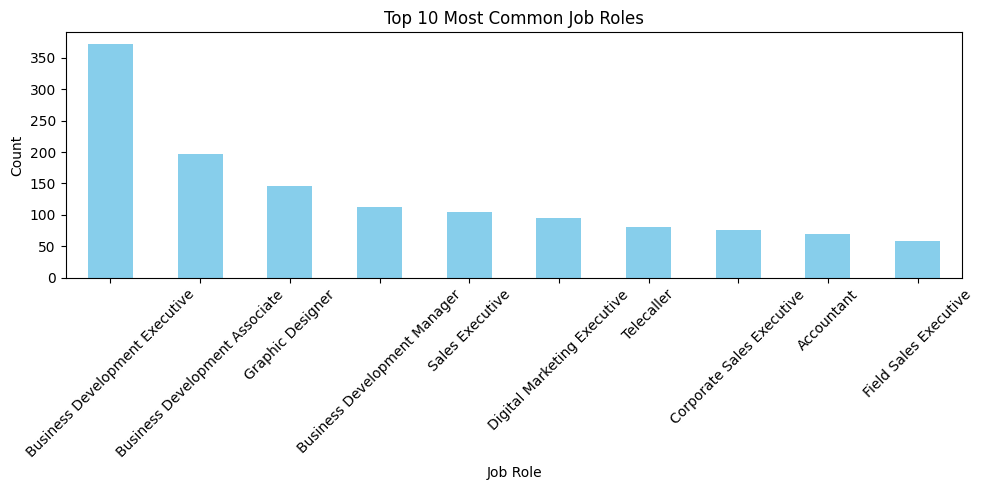

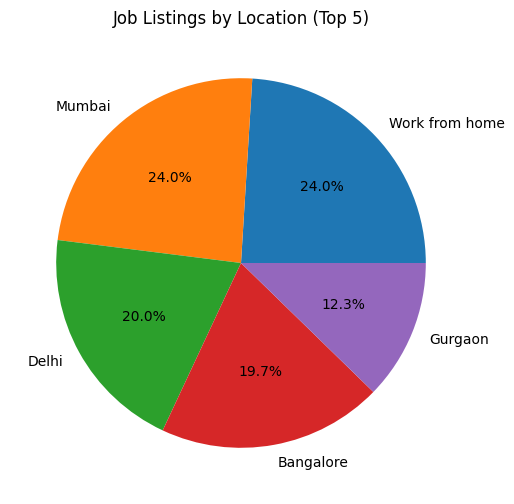

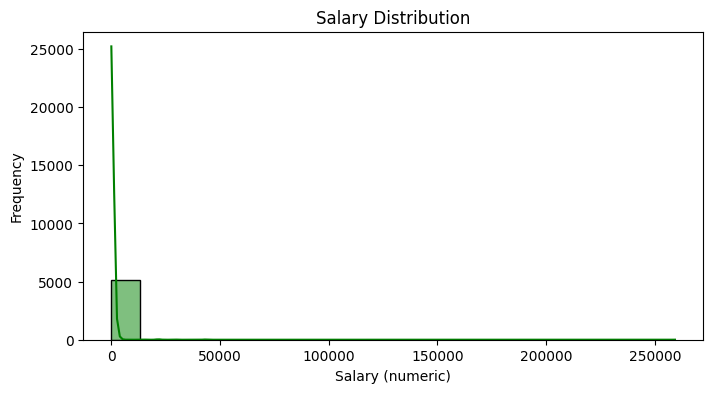

📊 Linear Regression Model Evaluation
Mean Absolute Error (MAE): 705.49
R² Score: 0.00

🔍 Sample Predictions:
Actual: 23.00 | Predicted: 315.91
Actual: 3.66 | Predicted: 842.48
Actual: 355.50 | Predicted: 383.89
Actual: 244.80 | Predicted: 457.08
Actual: 254.50 | Predicted: 717.68


In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


from google.colab import files
uploaded = files.upload()


df = pd.read_csv("Job.csv")
df = df.dropna(subset=["Type_of_job", "company_name", "experience", "salary"])


def clean_salary(s):
    s = re.sub(r"[^\d.]", "", str(s))
    s = re.sub(r"\.(?=.*\.)", "", s)
    return s

df["salary_cleaned"] = df["salary"].apply(clean_salary)
df = df[df["salary_cleaned"].str.match(r"^\d+(\.\d+)?$")]
df.loc[:, "salary_numeric"] = df["salary_cleaned"].astype(float)




plt.figure(figsize=(10, 5))
df["Type_of_job"].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 6))
df["location"].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title("Job Listings by Location (Top 5)")
plt.ylabel("")
plt.show()


plt.figure(figsize=(8, 4))
sns.histplot(df["salary_numeric"], bins=20, kde=True, color='green')
plt.title("Salary Distribution")
plt.xlabel("Salary (numeric)")
plt.ylabel("Frequency")
plt.show()

s
le_job = LabelEncoder()
le_company = LabelEncoder()
le_exp = LabelEncoder()

df["job_enc"] = le_job.fit_transform(df["Type_of_job"])
df["company_enc"] = le_company.fit_transform(df["company_name"])
df["exp_enc"] = le_exp.fit_transform(df["experience"])


X = df[["job_enc", "company_enc", "exp_enc"]]
y = df["salary_numeric"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Model Evaluation")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


print("\n🔍 Sample Predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    print(f"Actual: {actual:.2f} | Predicted: {predicted:.2f}")


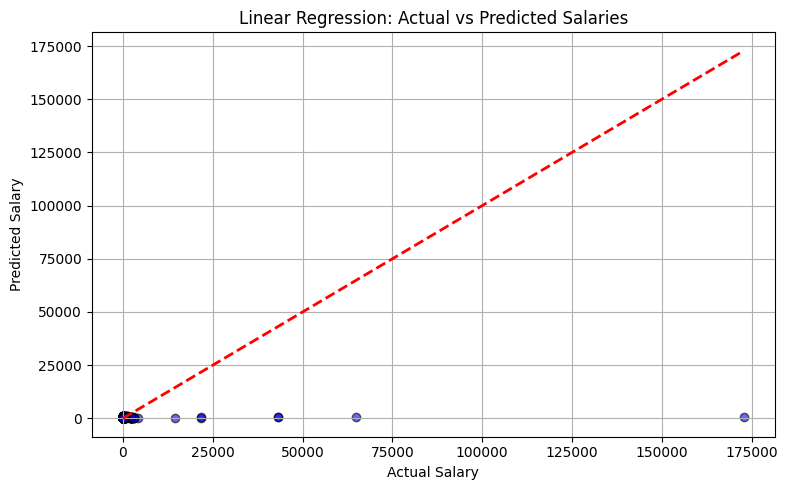

In [13]:
# 📊 Plot Actual vs Predicted Salaries
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Linear Regression: Actual vs Predicted Salaries")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()
